In [73]:
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore

In [74]:
NUM_ITERATIONS = 10
NUM_PARTICLES = 10
EARLY_STOPPING_PATIENCE = 30

In [75]:
def cost_function(sample):
    return (sample - 3) ** 2 + 4

In [76]:
def generate_particle():
    position = np.random.uniform(low=-100.0, high=100.0, size=1)
    position = position.item()

    return {
        "position": position,
        "score": cost_function(position),
        "velocity": None,
        "pbest": None,
    }

In [77]:
def determine_leaders(particles):
    for wolf in particles:
        wolf["type"] = "omega"

    particles = sorted(particles, key=lambda x: x["score"])
    particles[0]["type"] = "alpha"
    particles[1]["type"] = "beta"
    particles[2]["type"] = "delta"
    
    return particles

In [78]:
def calculate_a(iteration):
    return 2 * (1 - iteration / (NUM_ITERATIONS - 1))

In [79]:
def calculate_distance(x_leader, x_omega, iteration):
    a = calculate_a(iteration)
    r1 = np.random.rand()
    r2 = np.random.rand()
    A = 2 * a * r1 - a
    C = 2 * r2
    D_leader = np.abs(C * x_leader - x_omega)

    return D_leader, A

In [80]:
def update_position(particles, iteration):
    particles_to_update = particles[3:]

    X_alpha = particles[0]["position"]
    X_beta = particles[1]["position"]
    X_delta = particles[2]["position"]

    for omega_wolf in particles_to_update:
        D_alpha, A_1 = calculate_distance(X_alpha, omega_wolf["position"], iteration)
        D_beta, A_2 = calculate_distance(X_beta, omega_wolf["position"], iteration)
        D_delta, A_3 = calculate_distance(X_delta, omega_wolf["position"], iteration)

        X_1 = X_alpha - A_1 * D_alpha
        X_2 = X_beta - A_2 * D_beta
        X_3 = X_delta - A_3 * D_delta

        omega_wolf["position"] = (X_1 + X_2 + X_3) / 3
        omega_wolf["position"] = omega_wolf["position"].item()
        omega_wolf["score"] = cost_function(omega_wolf["position"])

In [81]:
def plot(particles):
    # Obtendo os valores de posição como NumPy array
    positions = [wolf["position"] for wolf in particles]

    # Criando o gráfico com uma linha horizontal e pontos em positions
    plt.figure(figsize=(22, 4))
    plt.plot(
        positions,
        [0] * len(positions),
        marker="o",
        color="b",
        linestyle="",
        label="Pontos",
    )  # Plotando pontos em positions, eixo y fixado em zero
    plt.xlabel("Valor de X")  # Nomeando o eixo x
    plt.ylabel("Valor de Y")  # Nomeando o eixo y
    plt.title("Gráfico de Linha Unidimensional com Pontos")
    plt.xlim(-100, 100)
    plt.legend()  # Mostrando a legenda
    plt.grid(True)  # Adicionando grade ao gráfico (opcional)
    plt.show()  # Exibindo o gráfico

In [82]:
particles = [generate_particle() for _ in range(NUM_PARTICLES)]

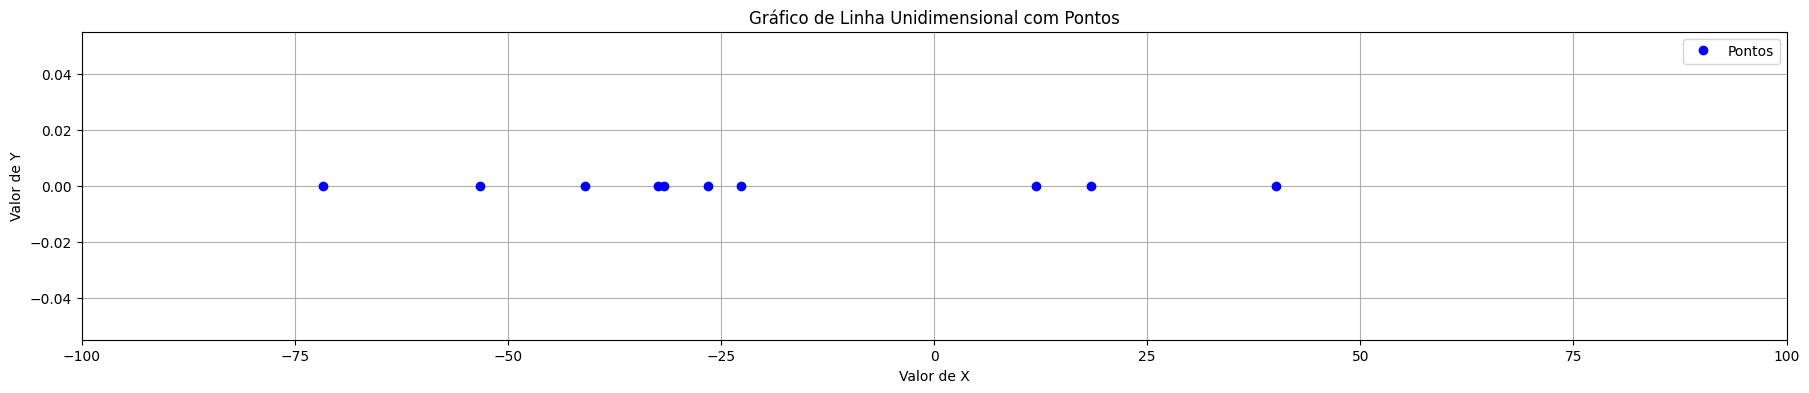

In [83]:
plot(particles)

In [84]:
i = 0

while True:
    print(f"Iteration {i+1}")

    update_position(particles, i)
    particles = determine_leaders(particles)
    i += 1

    if i == NUM_ITERATIONS:
        break

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


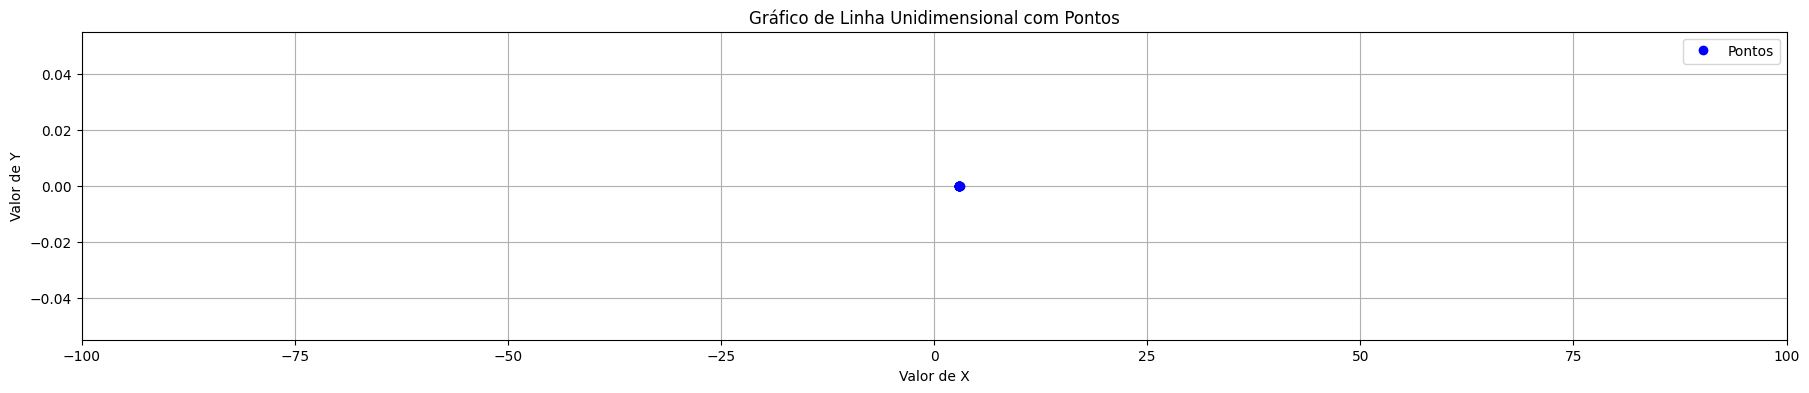

In [85]:
plot(particles)